# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [2]:
import networkx as nx

from src.model import VRP, create_constraints, output_variables, create_example_2
from src.pricer import VRPPricer
from src.parse import parse
from src.output import write_solution

from matplotlib import pyplot as plt
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
# G = parse("E-n22-k4")
# G = parse("E-n23-k3")
# G = parse("E-n30-k3")
# G = parse("E-n33-k4")
# G = parse("E-n51-k5")
# G = parse("E-n76-k14",filename="output/E-n76-k14.debug")
# G = parse("E-n101-k14",filename="output/E-n101-k14.debug")
# G = parse("X-n101-k25",26)
# G = parse("Instances/Uchoa/X-n106-k14.vrp")
# G.graph['min_trucks'] = 14
# G = parse("Instances/Uchoa/X-n110-k13.vrp")
# G.graph['min_trucks'] = 13
# G = parse("Instances/Uchoa/X-n115-k10.vrp")
# G.graph['min_trucks'] = 10
# G = parse("X-n120-k6",6)
# G = parse("Instances/Uchoa/X-n125-k30.vrp")
# G.graph['min_trucks'] = 30
# G = parse("Instances/Uchoa/X-n129-k18.vrp")
# G.graph['min_trucks'] = 18
# G = parse("Instances/Uchoa/X-n200-k36.vrp")
# G.graph['min_trucks'] = 36
# G = parse("Instances/Uchoa/X-n228-k23.vrp")
# G.graph['min_trucks'] = 23
# G = parse("Instances/Uchoa/X-n251-k28.vrp")
# G.graph['min_trucks'] = 28
# G = parse("Instances/Uchoa/X-n256-k16.vrp")
# G.graph['min_trucks'] = 16
# G = parse("Instances/Uchoa/X-n289-k60.vrp")
# G.graph['min_trucks'] = 61
# G = parse("Instances/Uchoa/X-n502-k39.vrp")
# G.graph['min_trucks'] = 39 #TODO: Ist dieses K auch das K, einer Optimallösung?
G = parse("X-n331-k15",15)

MAIN: Instance X-n331-k15
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 15
PARSE: Writing to file output/X-n331-k15.log


In [4]:
model = VRP(G)

# Create pricer
pricer = VRPPricer(G)
pricer.data['methods'] = ["ng8"]
pricer.data["ESPPRC_heur"] = True
pricer.data['max_vars']= int(1e2)
pricer.data['time_limit'] = 11000
pricer.data['farley'] = False

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,pricer,heuristic_stale_it=20, heuristic_max_it=2, heuristic_time=10)

model.optimize()
model.hideOutput(quiet=False)

write_solution(model, pricer)

HYGESE: Found 30 initial routes in 2 rounds. Best sol val is 31236.0
SETUP: methods are ['ng8']
SETUP: time_limit is 11000
SETUP: Farley is False
PRICER_PY: The maximal path length is 25
PRICER_PY: The neighborhood has been initialized to [8] neighbors.
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 360 variables (0 bin, 0 int, 0 impl, 360 cont) and 331 constraints
    331 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.6s|     1 |     0 |    46 |     - |    LP  |   0 | 360 | 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.123600e+04 |    Inf | unknown
  0.7s|     1 |     0 |    91 |   

r2069s|     1 |     0 |872654 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119416e+04 |    Inf | unknown
r2071s|     1 |     0 |873126 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119402e+04 |    Inf | unknown
r2074s|     1 |     0 |873628 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119388e+04 |    Inf | unknown
r2081s|     1 |     0 |875403 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119221e+04 |    Inf | unknown
r2084s|     1 |     0 |876016 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119190e+04 |    Inf | unknown
r2088s|     1 |     0 |876919 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119135e+04 |    Inf | unknown
r2094s|     1 |     0 |878396 |     - |simplero|   0 |  61k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.119010e+04 |    Inf | unknown

r2293s|     1 |     0 |923688 |     - |simplero|   0 |  66k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.116336e+04 |    Inf | unknown
 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
r2303s|     1 |     0 |926171 |     - |simplero|   0 |  66k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.116114e+04 |    Inf | unknown
r2311s|     1 |     0 |928085 |     - |simplero|   0 |  66k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.115999e+04 |    Inf | unknown
r2319s|     1 |     0 |929978 |     - |simplero|   0 |  66k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.115890e+04 |    Inf | unknown
r2327s|     1 |     0 |931831 |     - |simplero|   0 |  66k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.115786e+04 |    Inf | unknown
r2330s|     1 |     0 |932519 |     - |simplero|   0 |  67k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.115770e+04 |    Inf | unknown

r2604s|     1 |     0 |993765 |     - |simplero|   0 |  71k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111770e+04 |    Inf | unknown
r2610s|     1 |     0 |995178 |     - |simplero|   0 |  71k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111689e+04 |    Inf | unknown
r2617s|     1 |     0 |996658 |     - |simplero|   0 |  72k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111568e+04 |    Inf | unknown
r2623s|     1 |     0 |998038 |     - |simplero|   0 |  72k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111458e+04 |    Inf | unknown
r2627s|     1 |     0 |998688 |     - |simplero|   0 |  72k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111434e+04 |    Inf | unknown
r2631s|     1 |     0 |999605 |     - |simplero|   0 |  72k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111383e+04 |    Inf | unknown
r2637s|     1 |     0 |  1000k|     - |simplero|   0 |  72k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.111304e+04 |    Inf | unknown

r2877s|     1 |     0 |  1049k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108427e+04 |    Inf | unknown
r2883s|     1 |     0 |  1050k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108358e+04 |    Inf | unknown
r2889s|     1 |     0 |  1051k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108309e+04 |    Inf | unknown
r2893s|     1 |     0 |  1052k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108279e+04 |    Inf | unknown
r2897s|     1 |     0 |  1053k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108258e+04 |    Inf | unknown
r2901s|     1 |     0 |  1053k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108239e+04 |    Inf | unknown
r2904s|     1 |     0 |  1054k|     - |simplero|   0 |  77k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.108227e+04 |    Inf | unknown

r3178s|     1 |     0 |  1107k|     - |simplero|   0 |  82k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.103394e+04 |    Inf | unknown
r3185s|     1 |     0 |  1108k|     - |simplero|   0 |  82k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.103181e+04 |    Inf | unknown
r3193s|     1 |     0 |  1110k|     - |simplero|   0 |  82k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.102872e+04 |    Inf | unknown
 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
r3194s|     1 |     0 |  1110k|     - |simplero|   0 |  83k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.102870e+04 |    Inf | unknown
r3202s|     1 |     0 |  1111k|     - |simplero|   0 |  83k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.102490e+04 |    Inf | unknown
r3205s|     1 |     0 |  1112k|     - |simplero|   0 |  83k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.102380e+04 |    Inf | unknown

r3433s|     1 |     0 |  1156k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.086559e+04 |    Inf | unknown
r3436s|     1 |     0 |  1156k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.086450e+04 |    Inf | unknown
r3441s|     1 |     0 |  1157k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.086323e+04 |    Inf | unknown
r3443s|     1 |     0 |  1157k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.086221e+04 |    Inf | unknown
r3449s|     1 |     0 |  1158k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.085956e+04 |    Inf | unknown
r3453s|     1 |     0 |  1159k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.085764e+04 |    Inf | unknown
r3455s|     1 |     0 |  1160k|     - |simplero|   0 |  88k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.085741e+04 |    Inf | unknown

r3714s|     1 |     0 |  1208k|     - |simplero|   0 |  93k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.076012e+04 |    Inf | unknown
r3717s|     1 |     0 |  1209k|     - |simplero|   0 |  93k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.075926e+04 |    Inf | unknown
r3725s|     1 |     0 |  1210k|     - |simplero|   0 |  93k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.075756e+04 |    Inf | unknown
r3731s|     1 |     0 |  1212k|     - |simplero|   0 |  93k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.075649e+04 |    Inf | unknown
r3735s|     1 |     0 |  1212k|     - |simplero|   0 |  94k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.075518e+04 |    Inf | unknown
r3740s|     1 |     0 |  1213k|     - |simplero|   0 |  94k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.075468e+04 |    Inf | unknown
r3746s|     1 |     0 |  1214k|     - |simplero|   0 |  94k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.075385e+04 |    Inf | unknown

r3921s|     1 |     0 |  1245k|     - |simplero|   0 |  97k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.072627e+04 |    Inf | unknown
r3922s|     1 |     0 |  1245k|     - |simplero|   0 |  97k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.072620e+04 |    Inf | unknown
r3930s|     1 |     0 |  1246k|     - |simplero|   0 |  98k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.072415e+04 |    Inf | unknown
r3932s|     1 |     0 |  1247k|     - |simplero|   0 |  98k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.072396e+04 |    Inf | unknown
 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
r3937s|     1 |     0 |  1248k|     - |simplero|   0 |  98k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.072256e+04 |    Inf | unknown
r3938s|     1 |     0 |  1248k|     - |simplero|   0 |  98k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.072252e+04 |    Inf | unknown

r4119s|     1 |     0 |  1270k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069800e+04 |    Inf | unknown
r4124s|     1 |     0 |  1271k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069713e+04 |    Inf | unknown
r4131s|     1 |     0 |  1272k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069625e+04 |    Inf | unknown
r4133s|     1 |     0 |  1272k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069600e+04 |    Inf | unknown
r4135s|     1 |     0 |  1273k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069566e+04 |    Inf | unknown
r4140s|     1 |     0 |  1273k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069503e+04 |    Inf | unknown
r4141s|     1 |     0 |  1274k|     - |simplero|   0 | 100k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.069500e+04 |    Inf | unknown

r4348s|     1 |     0 |  1294k|     - |simplero|   0 | 103k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.067514e+04 |    Inf | unknown
r4354s|     1 |     0 |  1295k|     - |simplero|   0 | 103k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.067411e+04 |    Inf | unknown
 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
r4356s|     1 |     0 |  1295k|     - |simplero|   0 | 103k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.067411e+04 |    Inf | unknown
r4359s|     1 |     0 |  1295k|     - |simplero|   0 | 103k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.067407e+04 |    Inf | unknown
r4360s|     1 |     0 |  1295k|     - |simplero|   0 | 103k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.067405e+04 |    Inf | unknown
r4361s|     1 |     0 |  1295k|     - |simplero|   0 | 103k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.067405e+04 |    Inf | unknown

PRICER_PY: Heuristic failed. Running exact pricing.
r4617s|     1 |     0 |  1313k|     - |simplero|   0 | 105k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.066119e+04 |    Inf | unknown
r4620s|     1 |     0 |  1313k|     - |simplero|   0 | 105k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.066060e+04 |    Inf | unknown
r4621s|     1 |     0 |  1313k|     - |simplero|   0 | 105k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.066055e+04 |    Inf | unknown
r4622s|     1 |     0 |  1313k|     - |simplero|   0 | 105k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.066055e+04 |    Inf | unknown
r4625s|     1 |     0 |  1313k|     - |simplero|   0 | 105k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.066039e+04 |    Inf | unknown
r4629s|     1 |     0 |  1314k|     - |simplero|   0 | 105k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.066026e+04 |    Inf | unknown
PRICER_PY: Heuristic failed. Running exact pricing.
r4667s|     1 |     0 |  1315k|     - 

PRICER_PY: Heuristic failed. Running exact pricing.
r5112s|     1 |     0 |  1328k|     - |simplero|   0 | 107k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.064972e+04 |    Inf | unknown
r5113s|     1 |     0 |  1328k|     - |simplero|   0 | 107k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.064970e+04 |    Inf | unknown
r5114s|     1 |     0 |  1328k|     - |simplero|   0 | 107k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.064969e+04 |    Inf | unknown
r5115s|     1 |     0 |  1328k|     - |simplero|   0 | 107k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.064967e+04 |    Inf | unknown
 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
r5116s|     1 |     0 |  1328k|     - |simplero|   0 | 107k| 331 | 331 |   0 |  0 |   0 |   0 |      --      | 3.064965e+04 |    Inf | unknown
r5117s|     1 |     0 |  1328k|     - |simplero|   0 | 107k| 331 | 331 |   0 |  0 |   0 | 

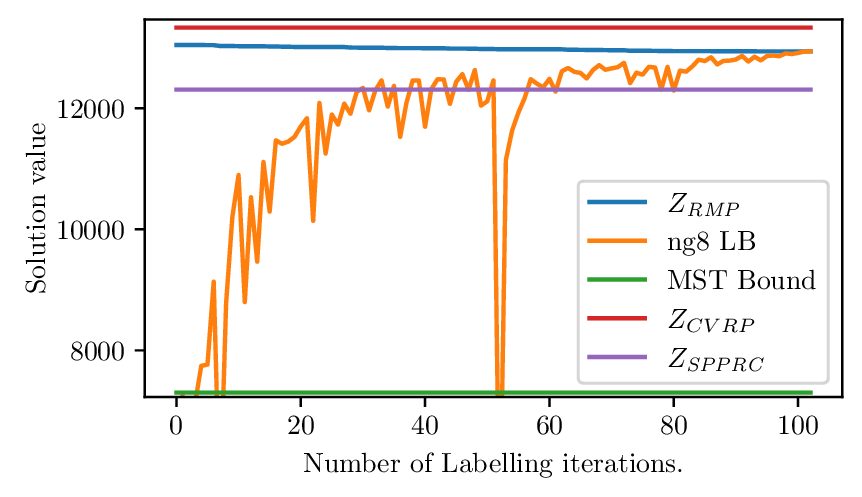

In [61]:
# This value is nice looking for the standard latex layout
# plt.figure(figsize=(6.6,4),dpi=100)

This value is nice looking for the CoAn layout
plt.figure(figsize=(7.3,4),dpi=200)

# This value is the original value for the presentation but looks horrible
# plt.figure(figsize=(4.5,2.5),dpi=200)

upper_bounds = [x for x,y in pricer.data['bounds'][pricer.data['methods'][0]]]
plt.plot(upper_bounds, label="$Z_{\mathit{RMP}}$")

xmax = 0
for method in pricer.data['methods']:
    lower_bounds = [lb for _,lb in pricer.data['bounds'][method]]
#     lower_bounds = []
#     best_lb = pricer.data['bounds'][method][0][1]
#     for x,y in pricer.data['bounds'][method]:
#         if y > best_lb:
#             best_lb = y
#         lower_bounds.append(best_lb)
    plt.plot(lower_bounds, label=f'{method} LB')
    xmax = max(upper_bounds[0],xmax)

T = nx.minimum_spanning_tree(G)
K = G.graph['min_trucks']
lowest_remaining_edge_weights = [weight for u,v,weight in G.edges().data('weight') if not T.has_edge(u,v)]
mst = T.size(weight='weight') + sum(sorted(lowest_remaining_edge_weights)[:K])
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

optimal = [13332 for i in range(len(upper_bounds))]
plt.plot(optimal, label="$Z_{CVRP}$")

spprc = [12308 for i in range(len(upper_bounds))]
plt.plot(spprc, label="$Z_{\mathit{SPPRC}}$")

# ng8 = [481 for i in range(len(upper_bounds))]
# plt.plot(ng8, label="Optimal value of ng 8.")

# cyc2 = [12784 for i in range(len(upper_bounds))]
# plt.plot(cyc2, label="$Z_{\mathit{2-cycle}}$")

if pricer.data['farley']:
    farley_bounds = pricer.data['farley_bound']
    plt.plot(farley_bounds, label="Farley Bound")

# solval = model.getObjVal()
# sol = [solval for i in range(len(upper_bounds))]
# plt.plot(sol,label="$Z_{MP}")

plt.ylim((mst[0]*0.99,optimal[0]*1.01))

plt.legend(loc='lower right')
plt.xlabel("Number of Labelling iterations.")
plt.ylabel("Solution value")
plt.savefig("plots/X-n120-k6.ng8-fluctuations-presentation.pgf")
# plt.show()

In [5]:
output_variables(model, pricer)

The solution contains the following paths: 
Only paths with associated value larger than 1e-06 are analysed.
Solution contains only elementary paths.
